### **IRIS-Flower**

The Iris dataset is one of the most famous and widely used datasets in data science, statistics, and machine learning. Introduced by British biologist and statistician Ronald A. Fisher in 1936, the dataset was originally created for demonstrating discriminant analysis but has since become a standard for testing classification algorithms.

The dataset contains 150 samples from three different species of the Iris flower:

*Iris setosa

*Iris versicolor

*Iris virginica

Each sample (or row) includes four features (independent variables) that describe the physical characteristics of the flower:

1.Sepal length (in centimeters)

2.Sepal width (in centimeters)

3.Petal length (in centimeters)

4.Petal width (in centimeters)

# Drive mounte

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import math
import scipy.stats as stats
#Preprocessing
from sklearn.preprocessing import LabelEncoder , MinMaxScaler , QuantileTransformer , PowerTransformer
#Model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
#Evaluate
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score , confusion_matrix
#Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Load Dataset

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Mine/IT/iris.csv')

# Head of data

In [ ]:
df.head(5)

,Id,SepalLength[cm],SepalWidth[cm],PetalLength[cm],PetalWidth[cm],Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


# Drooping Columns 'ID'

In [ ]:
# Drooping Id
df.drop(columns=['Id'],inplace=True)

In [ ]:
df.head(5)

,SepalLength[cm],SepalWidth[cm],PetalLength[cm],PetalWidth[cm],Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Dataset Information

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   SepalLength[cm]  150 non-null    float64
 1   SepalWidth[cm]   150 non-null    float64
 2   PetalLength[cm]  150 non-null    float64
 3   PetalWidth[cm]   150 non-null    float64
 4   Species          150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


Describe Dataset

In [ ]:
df.describe()

,SepalLength[cm],SepalWidth[cm],PetalLength[cm],PetalWidth[cm]
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Null Values of Data

In [ ]:
df.isnull().sum()

,0
SepalLength[cm],0
SepalWidth[cm],0
PetalLength[cm],0
PetalWidth[cm],0
Species,0


Shape of Dataset

In [ ]:
df.shape

(150, 5)

Duplicate Values of Dataset

In [ ]:
df.duplicated().sum()

np.int64(3)

# Categorical Columns Of Data

In [ ]:
# Printing Columns That Have Dtype is Object or categorical.
object_columns = df.select_dtypes(include=['object']).columns
print(f'The Following Columns Have Dtype as Object \n: {object_columns}')
print(f'The Value Count of Categorical Columns is : {object_columns.value_counts().sum()}')

The Following Columns Have Dtype as Object 
: Index(['Species'], dtype='object')
The Value Count of Categorical Columns is : 1


# Numerical Columns Of Data

In [ ]:
# Printing Columns That Have Dtype is FLoat or int
float_columns = df.select_dtypes(include=['float','int']).columns
print(f'The Following Columns Have Dtype as Float and int :\n{float_columns}')
print(f'The Value Count of Float Columns is : {float_columns.value_counts().sum()}')

The Following Columns Have Dtype as Float and int :
Index(['SepalLength[cm]', 'SepalWidth[cm]', 'PetalLength[cm]',
       'PetalWidth[cm]'],
      dtype='object')
The Value Count of Float Columns is : 4


Finding All Features...Mean,Median,Standard_Deviasion and Count

In [ ]:
def print_feature_stats(df):
    numeric_features = df.select_dtypes(include=['float64', 'int64']).columns
    for feature in numeric_features:
        feature_data = df[feature]
        feature_mean = feature_data.mean()
        feature_median = feature_data.median()
        feature_std = feature_data.std()
        feature_count = feature_data.count()

        print(f"Feature: {feature}")
        print(f"Mean: {feature_mean:.2f}")
        print(f"Median: {feature_median:.2f}")
        print(f"Standard Deviation: {feature_std:.2f}")
        print(f"Count: {feature_count}")
        print()
print_feature_stats(df)

Feature: SepalLength[cm]
Mean: 5.84
Median: 5.80
Standard Deviation: 0.83
Count: 150

Feature: SepalWidth[cm]
Mean: 3.05
Median: 3.00
Standard Deviation: 0.43
Count: 150

Feature: PetalLength[cm]
Mean: 3.76
Median: 4.35
Standard Deviation: 1.76
Count: 150

Feature: PetalWidth[cm]
Mean: 1.20
Median: 1.30
Standard Deviation: 0.76
Count: 150



# Numerical Features

In [ ]:
numerical_features = [col for col in df.columns if df[col].dtype in ['int64', 'float64']]
# Calculate the number of rows and columns needed for subplots
num_cols = 2
num_rows = (len(numerical_features) + num_cols - 1) // num_cols  # Calculate number of rows based on columns

# Create subplots with the calculated number of rows and columns
fig = make_subplots(rows=num_rows, cols=num_cols)

# Loop through numerical columns and add boxplots with color
for i, col in enumerate(numerical_features, start=1):
    row_num = (i - 1) % num_rows + 1
    col_num = (i - 1) // num_rows + 1
    fig.add_trace(
        go.Box(
            x=df[col],
            name=col,
            marker_color='#1f77b4',  # Set box color
            line_color='#1f77b4'     # Set mean line color
        ),
        row=row_num,
        col=col_num
    )

fig.update_layout(title_text="Boxplots of Numerical Columns", showlegend=False,)

# Show the plot
fig.show()
# Update layout

Observation :

From Above Visualization , We Can See that SepalWidthCm Contains Some Outliers , and Other all are Perfectly Fine

# Species Count

In [ ]:
# Define custom colors
# custom_colors = ['#1f77b4', 'skyblue', 'cornflowerblue']
custom_colors = ['#1f77b4', 'skyblue', 'cornflowerblue']


# Create a pie chart with custom colors
fig_pie = px.pie(values=[50, 50, 50],
                 names=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'],
                 title='Pie Chart of Species Counts',
                 color_discrete_sequence=custom_colors)

# Show the pie chart
fig_pie.show()

Observation :

All The Species Have Same Values Count

# SepalLengthCm vs Species

In [ ]:
# Create a box plot to show the relationship between a numerical variable and a categorical variable
fig_boxplot = px.box(df, x="Species", y="SepalLength[cm]", title="Box Plot of SepalLengthCm by Species",
                     color='Species',  # Set box color based on Species
                     color_discrete_sequence=custom_colors  # Custom color sequence
                    )

# Update layout
fig_boxplot.update_layout(xaxis_title="Species", yaxis_title="SepalLengthCm",)

# Show the box plot
fig_boxplot.show()

Observation:

From the above visualization, it is evident that the species *Virginica exhibits a higher average value of Sepal Length (SepalLengthCm) compared to the other species. Conversely, the Setosa species demonstrates a lower average value of Sepal Length.*

# SepalWidthCm vs Species

In [ ]:
# Create a box plot to show the relationship between a numerical variable and a categorical variable
fig_boxplot = px.box(df, x="Species", y="SepalWidth[cm]", title="Box Plot of SepalWidthCm by Species",
                     color='Species',  # Set box color based on Species
                     color_discrete_sequence=custom_colors  # Custom color sequence
                    )

# Update layout
fig_boxplot.update_layout(xaxis_title="Species", yaxis_title="SepalWidthCm")

# Show the box plot
fig_boxplot.show()

Observation:

From the above visualization, it is evident that the species *Setosa exhibits a higher average value of Sepal Width (SepalWidthCm) compared to the other species. Conversely, the Versicolor species demonstrates a lower average value of Sepal Width.

# PetalLengthCm vs Species

In [ ]:
# Create a box plot to show the relationship between a numerical variable and a categorical variable
fig_boxplot = px.box(df, x="Species", y="PetalLength[cm]", title="Box Plot of PetalLengthCm by Species",
                     color='Species',  # Set box color based on Species
                     color_discrete_sequence=custom_colors  # Custom color sequence
                    )

# Update layout
fig_boxplot.update_layout(xaxis_title="Species", yaxis_title="PetalLengthCm",)

# Show the box plot
fig_boxplot.show()

Observation:

From the above visualization, it is evident that the species *Virginica exhibits a higher average value of Petal Length (PetalLengthCm) compared to the other species. Conversely, the Setosa species demonstrates a lower average value of Petal Length.*

# PetalWidthCm vs Species

In [ ]:
# Create a box plot to show the relationship between a numerical variable and a categorical variable
fig_boxplot = px.box(df, x="Species", y="PetalWidth[cm]", title="Box Plot of PetalWidthCm by Species",
                     color='Species',  # Set box color based on Species
                     color_discrete_sequence=custom_colors  # Custom color sequence
                    )

# Update layout
fig_boxplot.update_layout(xaxis_title="Species", yaxis_title="PetalWidthCm",)

# Show the box plot
fig_boxplot.show()

Observation:

From the above visualization, it is evident that the species *Virginica exhibits a higher average value of Petal Width (PetalWidthCm) compared to the other species. Conversely, the Setosa species demonstrates a lower average value of Petal Width.*

# Numerical Features Distribution

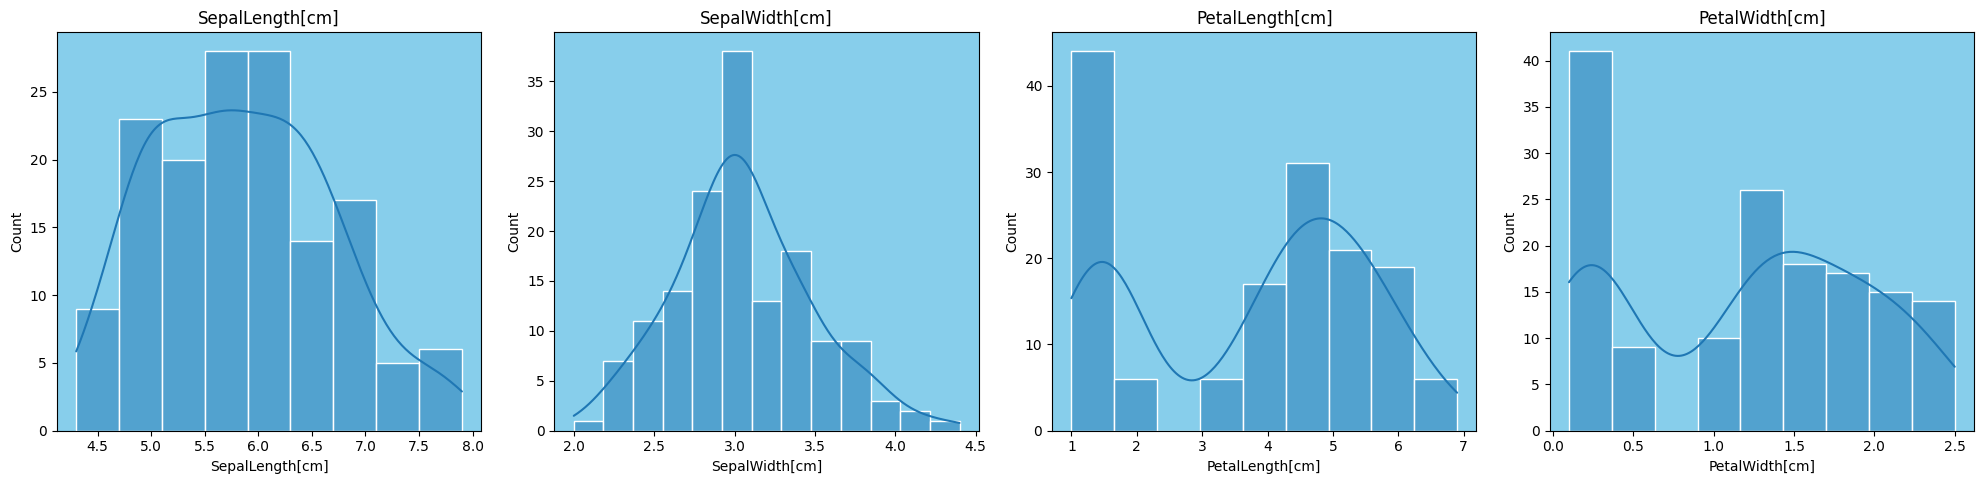

In [ ]:
numeric_features = [col for col in df.columns if df[col].dtype in ['int64', 'float64']]

# Calculate the number of rows and columns for subplots
num_features = len(numeric_features)
num_rows = math.ceil(num_features / 4)  # Adjust the number 4 based on how many plots you want per row
num_cols = min(num_features, 4)

# Set up the figure and axes for subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(5*num_cols, 5*num_rows))

# Flatten the axes for easier iteration
axes = axes.flatten()

sns.set_theme(style="darkgrid")

# Loop through each numerical feature and create a distribution plot with custom bar color
for i, col in enumerate(numeric_features):
    sns.histplot(df[col], kde=True, ax=axes[i])
    axes[i].set_title(col)
    axes[i].set_facecolor('skyblue')  # Set background color to skyblue
# Remove any unused subplots
for i in range(num_features, num_rows*num_cols):
    fig.delaxes(axes[i])

# Adjust layout
plt.tight_layout()
plt.show()

Observations:

Upon reviewing the plots above, it's evident that the distribution of Numerical Features does not follow a Gaussian distribution. Therefore, our next step is to transform the distribution of Numerical Features to adhere to a Gaussian distribution

# Quantile Transformer

In [ ]:
def quantile_transform(data,cols):
    # Transformer
    qt = QuantileTransformer(output_distribution='normal')
    #Use a Loop to Transformer
    for col in cols:
        data[col] = qt.fit_transform(data[[col]])
    return data
#Transform Data
df = quantile_transform(df,numeric_features)

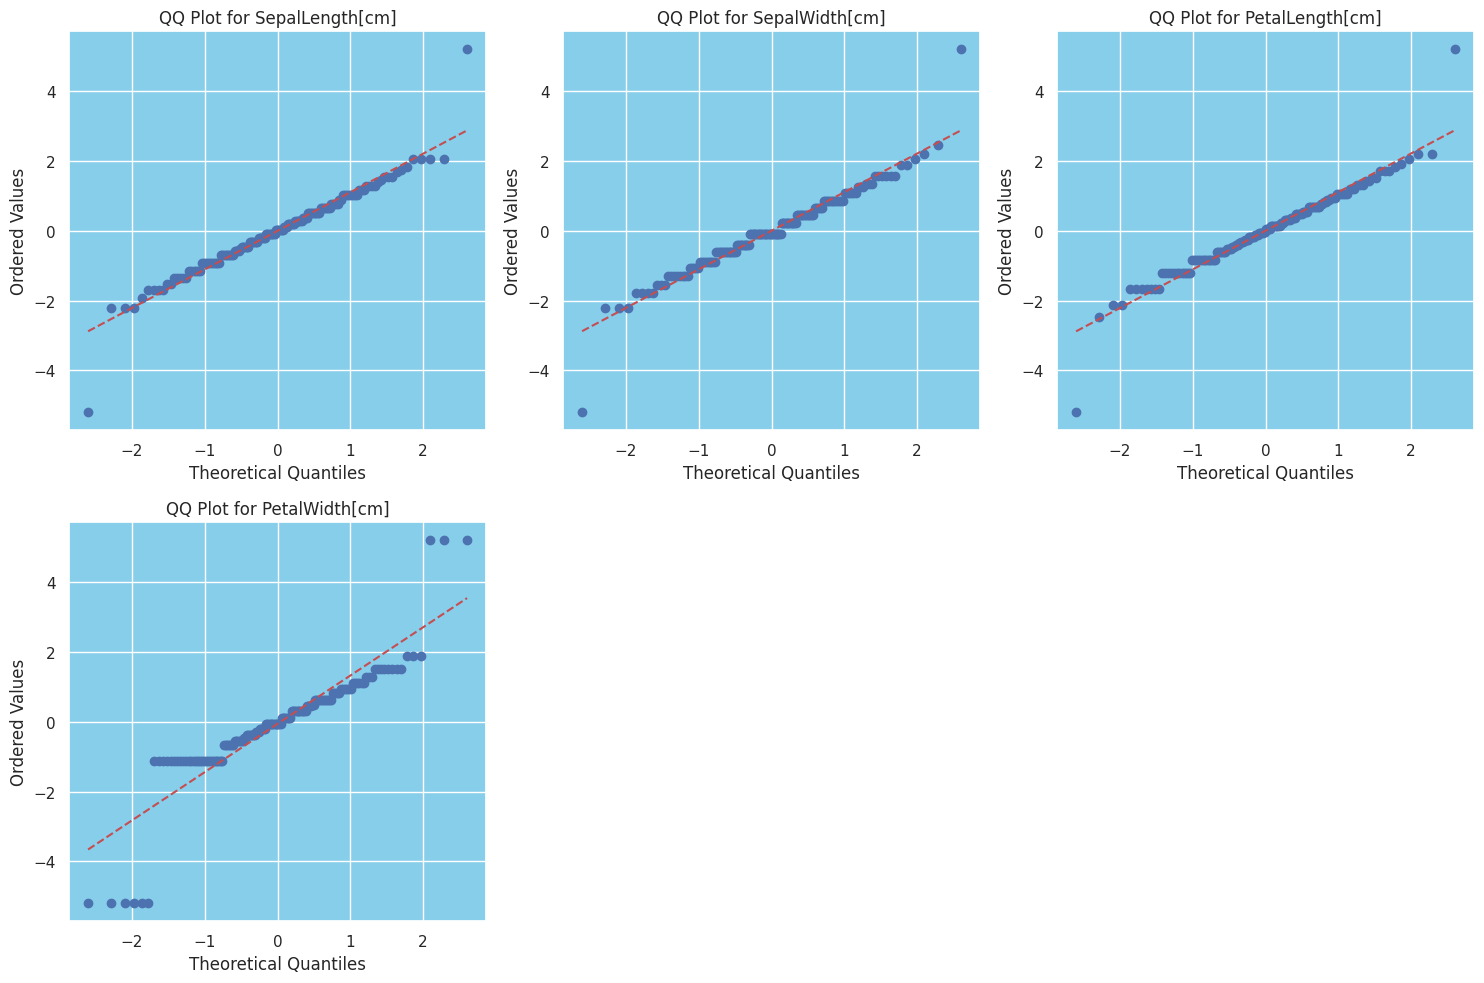

In [ ]:
# Function to create QQ plots
def plot_qq(df_qt, feature, ax):
    stats.probplot(df_qt[feature], dist="norm", plot=ax)
    ax.get_lines()[1].set_linestyle('--')
    ax.set_title(f"QQ Plot for {feature}")
    ax.set_xlabel("Theoretical Quantiles")
    ax.set_ylabel("Ordered Values")

# Calculate the number of rows and columns for subplots
num_features = len(numeric_features)
num_cols = 3  # Number of plots per row
num_rows = math.ceil(num_features / num_cols)

# Set up the figure and axes for subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(5*num_cols, 5*num_rows))

# Flatten the axes for easier iteration
axes = axes.flatten()

# Loop through each numerical feature and create a QQ plot
for i, col in enumerate(numeric_features):
    plot_qq(df, col, axes[i])
    axes[i].set_facecolor('skyblue')

# Remove any unused subplots
for i in range(num_features, num_rows*num_cols):
    fig.delaxes(axes[i])

# Adjust layout
plt.tight_layout()
plt.show()

MileStone:

Now our data exhibits a distribution closely resembling a Gaussian distribution. The Quantile Transformer has proven to be a valuable tool in achieving this transformation.

# Model Building

In [ ]:
def evaluate_results(y_test, y_pred):
    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Print evaluation metrics
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1-score:", f1)

    # Plot confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='blues')
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    return accuracy, precision, recall, f1

# SVM (Support Vector Machine)

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0


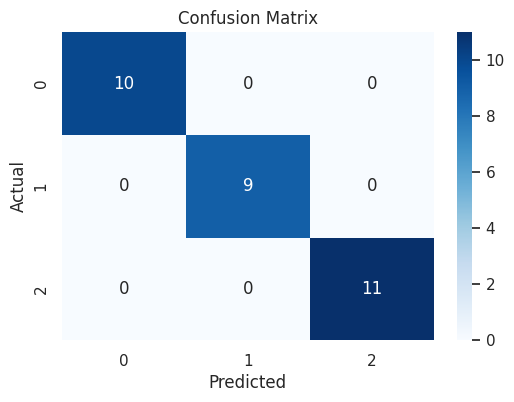

In [ ]:
# Splitting the data into Features & Targets
X = df.drop(columns='Species',axis=1)
y = df['Species']

# Splitting the data into Training and Testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the SVM model
svm_classifier = SVC(kernel='linear', C=1.0, decision_function_shape='ovr')
svm_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred_svm = svm_classifier.predict(X_test)

# Evaluate the model
accuracy_svm = evaluate_results(y_test,y_pred_svm)

# K-Nearest Neighbors (KNN)

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0


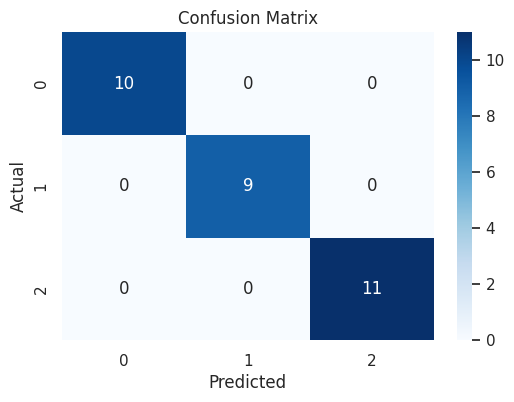

In [ ]:
# Split the data into features (X) and target (y)
X = df.drop(columns='Species')
y = df['Species']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)

# Train the model
knn_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred_knn = knn_classifier.predict(X_test)

#Evaluate
accuracy_knn = evaluate_results(y_test, y_pred_knn)

# Decision Tree Classifier

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0


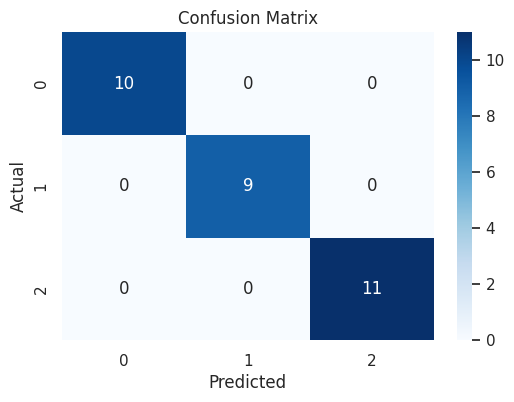

In [ ]:
# Split the data into features (X) and target (y)
X = df.drop(columns='Species')
y = df['Species']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier()

# Train the model
dt_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred_dt = dt_classifier.predict(X_test)

# Evaluate the model
accuracy_dt = evaluate_results(y_test, y_pred_dt)

# Conclusion !!!


In [ ]:
print('1. We have trained three models to evaluate their performance:')
print(f'- The SVM model achieved an accuracy of {accuracy_svm[0]:.2f}.')
print(f'- The KNN model achieved an accuracy of {accuracy_knn[0]:.2f}.')
print(f'- The Decision Tree model achieved an accuracy of {accuracy_dt[0]:.2f}.')
print(f'As we Know All The Models are Performing Well and giving Accuracy of 100%')

1. We have trained three models to evaluate their performance:
- The SVM model achieved an accuracy of 1.00.
- The KNN model achieved an accuracy of 1.00.
- The Decision Tree model achieved an accuracy of 1.00.
As we Know All The Models are Performing Well and giving Accuracy of 100%


In [ ]:
# Define model names and accuracies
model_names = ['SVM', 'KNN', 'Decision Tree']
accuracies = [accuracy_svm[0], accuracy_knn[0], accuracy_dt[0]]

# Create a bar plot
fig = go.Figure(data=[go.Bar(x=model_names, y=accuracies, marker_color='red')])
fig.update_layout(
                  title='Model Accuracies',
                  xaxis_title='Model',
                  yaxis_title='Accuracy',
                  yaxis=dict(tickformat=".2%"))
fig.show()